### Importing the data

In [95]:
#import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import palette,colors
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [97]:
df.shape       #data Shape

(7043, 21)

In [98]:
df.info()                  #data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
df.isnull().sum()                  #checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [100]:
df['Churn'].value_counts()                # From this we get to know our data is unbalanced as we have more negative examples
                                         # first i'll train the model on the same dataset after that i'll create new dataset 
                                          #by upsampling the minority class and compare the result

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Manipulation

In [101]:
data =df.copy() #creating copy of original dataset

In [102]:
data.drop('customerID',axis=1,inplace=True)   # dropping the customer id as it is of no use

## converting the object datatypes to numeric using Label encoder as we have categorical data and it will not increae the dimension as well


In [103]:
from sklearn.preprocessing import LabelEncoder 
data = data.apply(LabelEncoder().fit_transform)

In [104]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


### Data Visualization

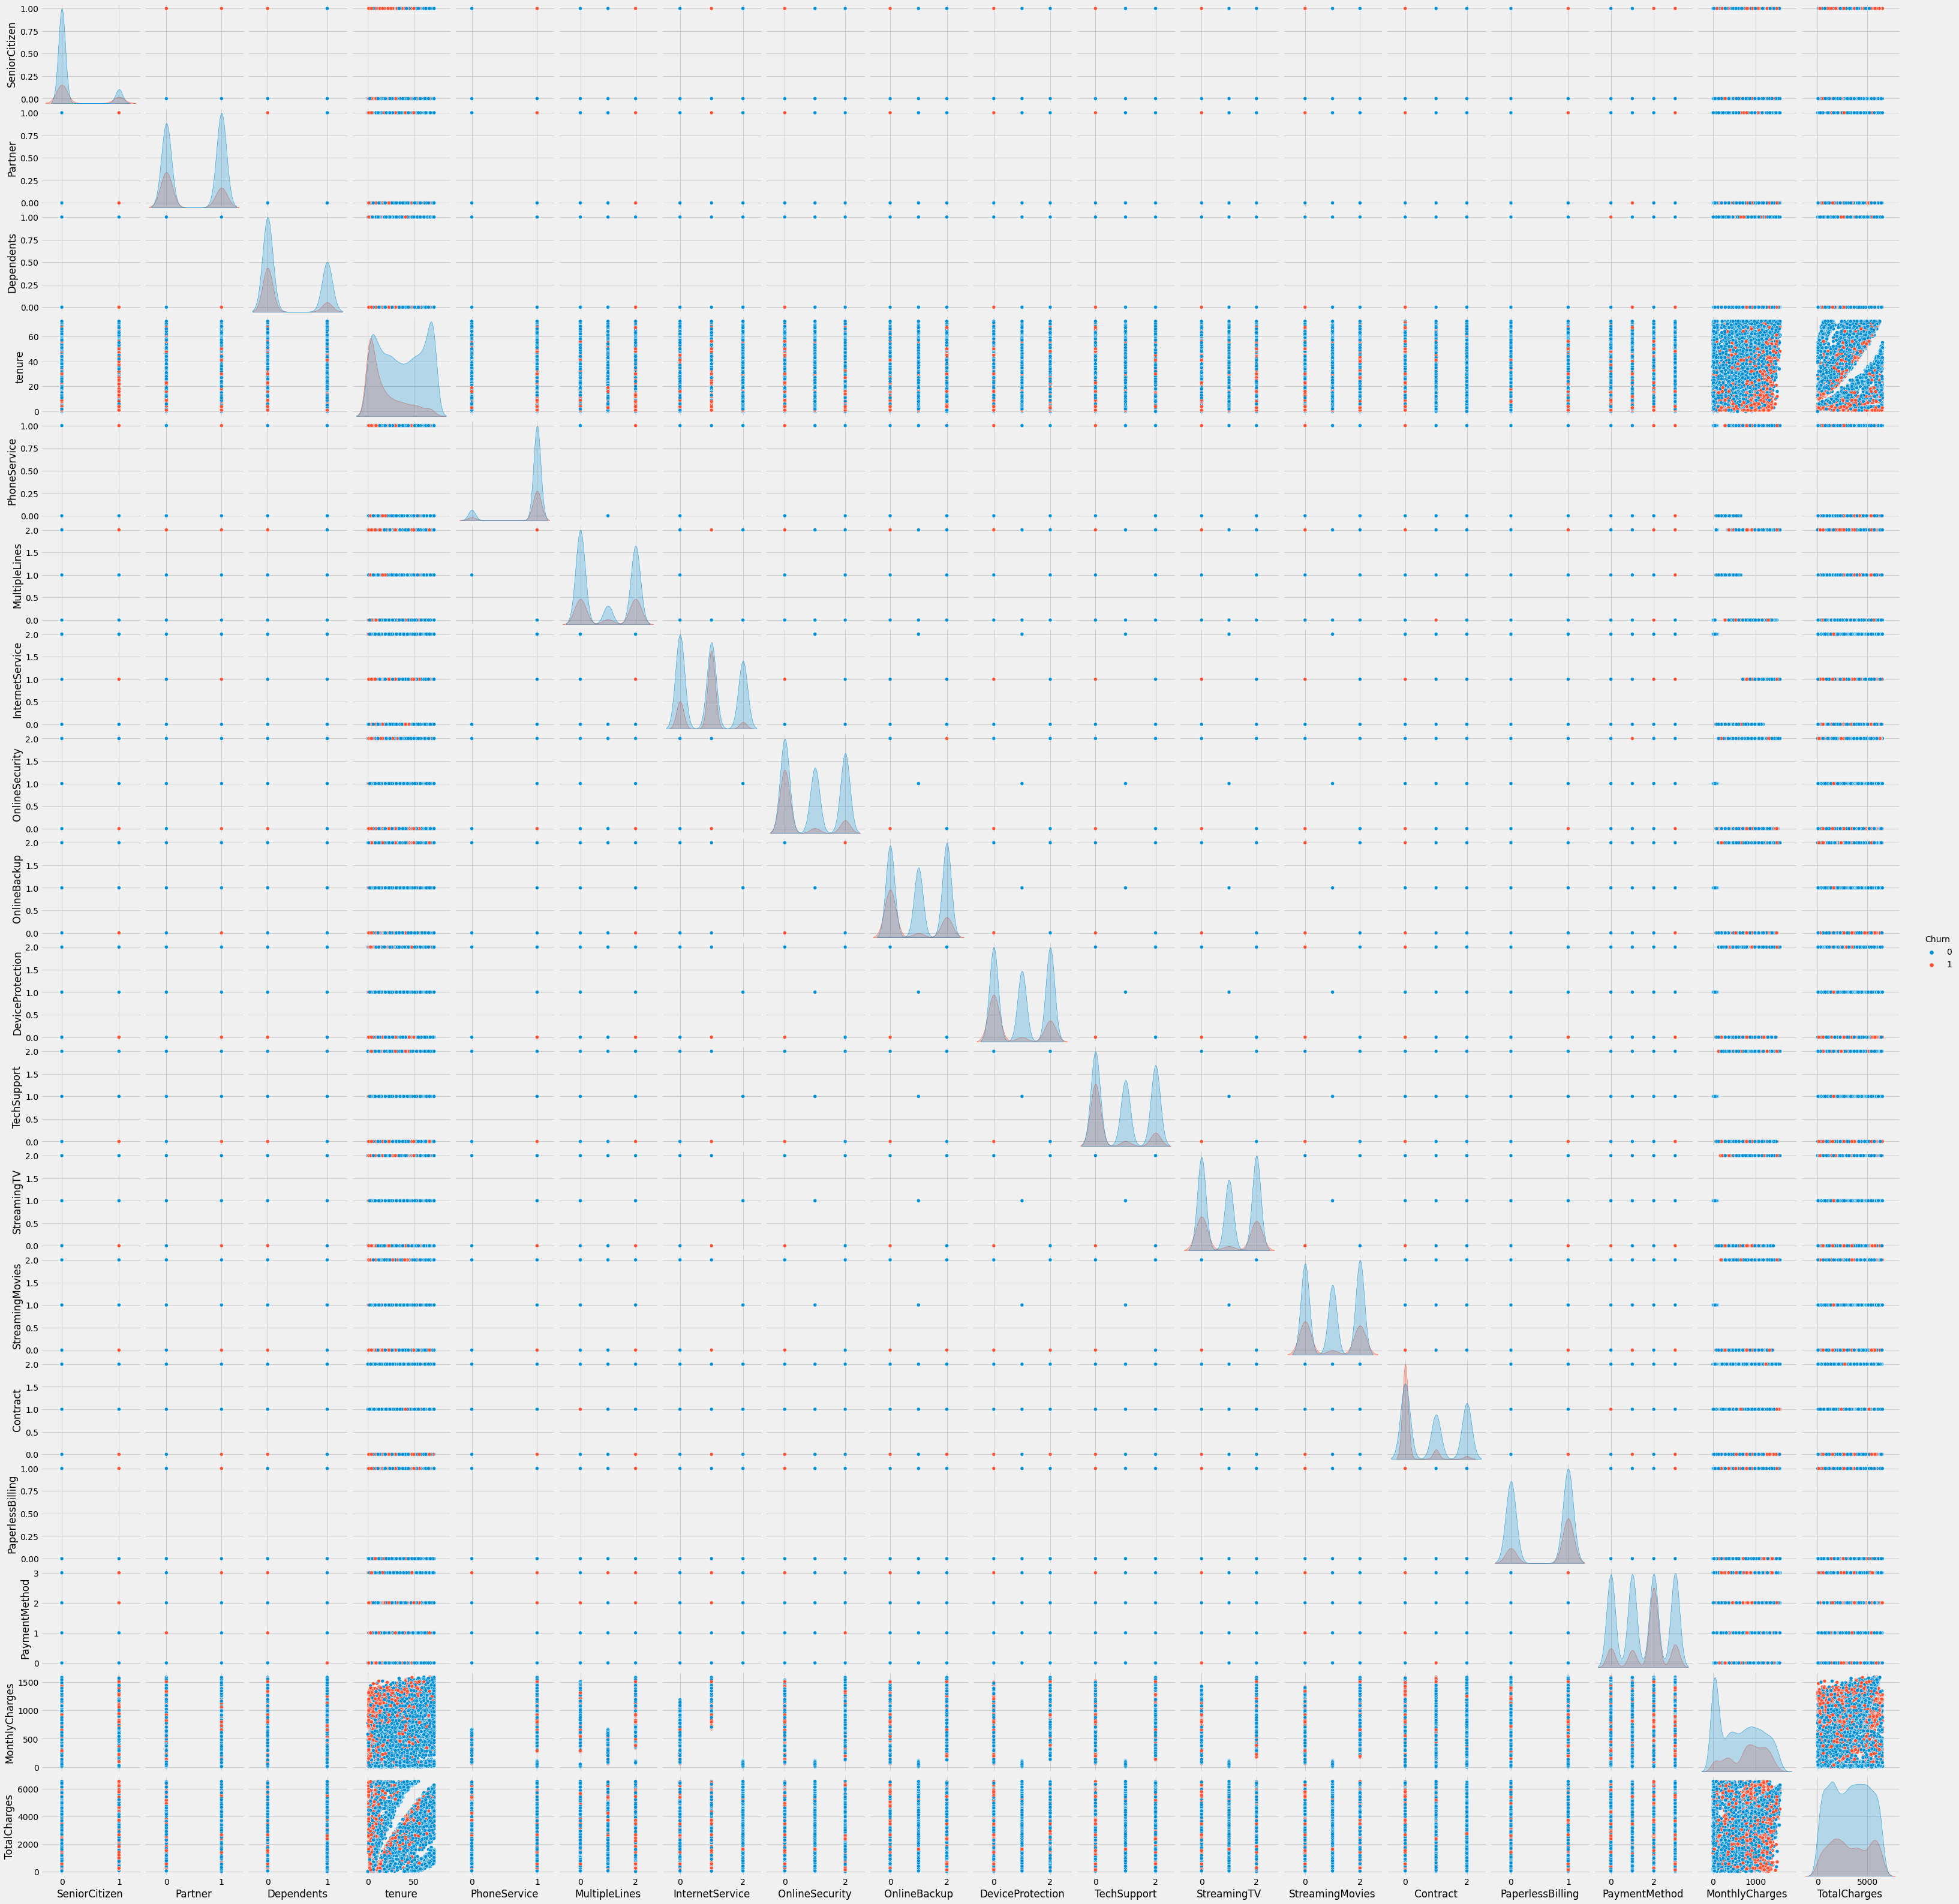

In [212]:
sns.pairplot(data,hue='Churn')

In [106]:
corr = data.corr()           #checking correlation
corr['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.191825
MonthlyCharges      0.183523
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [107]:
data.drop('gender',axis=1,inplace=True)

There is almost zero correlation or very less negative trend between gender and Churn so I dropped the gender attribute and we come know that there's no any gender bias  

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

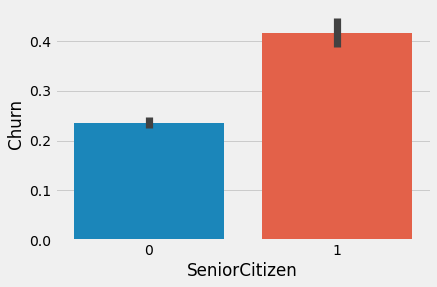

In [108]:
sns.barplot(x='SeniorCitizen',y= 'Churn',data=data)

In [109]:
map_bin  = {'No':0,'Yes':1}
df['Churn'] = df['Churn'].map(map_bin)     # using untransformed data for visualization

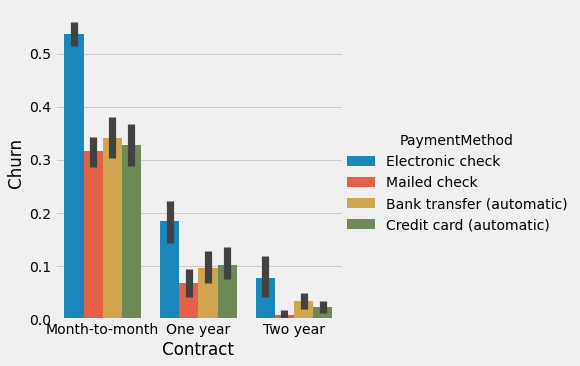

In [110]:
sns.catplot(x="Contract", y="Churn", hue="PaymentMethod", kind="bar", data=df)

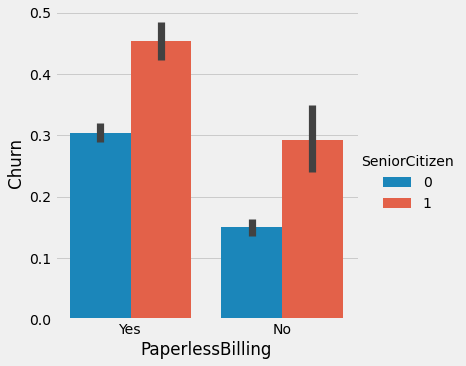

In [111]:
sns.catplot(x="PaperlessBilling", y="Churn", hue="SeniorCitizen", kind="bar", data=df)

In [112]:
### Conclusion: What all did you understand from the above charts
# from the pairplot i didn't get much information, but we can see a boundary of churn value in the tenure an monthly charges
# from the barplot it is clear that more senior citizen customer had left the company two months after the observation.

### Implement Machine Learning Models

In [113]:
X =data.drop('Churn',axis=1)
y= data['Churn']

In [114]:
from sklearn.preprocessing import StandardScaler  #standardization of data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [115]:
from sklearn.model_selection import train_test_split  #split of data in train,test set
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [116]:
from sklearn.linear_model import LogisticRegressionCV            #logistic Regression using l1 regularization
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(x_train, y_train)
y_pred_lr=lr_l1.predict(x_test)

In [117]:
from sklearn.tree import DecisionTreeClassifier                  # decision tree
dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt =dt.predict(x_test)

In [118]:
from keras.models  import Sequential                              #neural network
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [119]:
x_train.shape[1]

18

In [120]:
model_1 = Sequential()
model_1.add(Dense(32,input_shape =(18,) ,activation = 'relu'))
model_1.add(Dense(16 ,activation = 'relu'))
model_1.add(Dense(1,activation='sigmoid'))

In [121]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                608       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [122]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
166/166 [==============================] - 1s 4ms/step - loss: 110.2991 - accuracy: 0.7182 - val_loss: 0.6681 - val_accuracy: 0.7115
Epoch 2/5
166/166 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7377 - val_loss: 0.6500 - val_accuracy: 0.7166
Epoch 3/5
166/166 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7424 - val_loss: 0.6344 - val_accuracy: 0.7166
Epoch 4/5
166/166 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7429 - val_loss: 0.6179 - val_accuracy: 0.7166
Epoch 5/5
166/166 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7465 - val_loss: 0.5988 - val_accuracy: 0.7155


In [123]:
y_pred_k = model_1.predict_classes(x_test)

# UPsampling

In [163]:

df = pd.concat([x_train, y_train], axis=1)      #perform upsampling on training data
class_count_0, class_count_1 = df['Churn'].value_counts()

class_0 = df[df['Churn'] == 0]
class_1 = df[df['Churn'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (3912, 19)
class 1: (1370, 19)


total class of 1 and 0: 0    3912
1    3612
Name: Churn, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

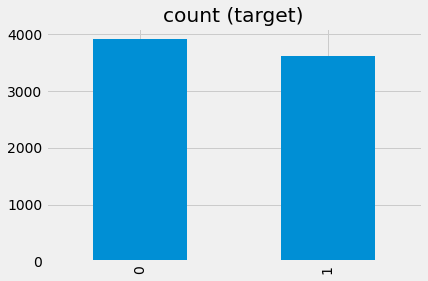

In [201]:
from sklearn.utils import resample

# upsample minority
class_under_0 = resample(class_1,
                          replace=True, # sample with replacement
                          n_samples=(len(class_0)-300), # not matching  the exact number in majority class
                          random_state=27) 

# combine majority and upsampled minority
upsampled = pd.concat([class_0, class_under_0])
   

print("total class of 1 and 0:",upsampled['Churn'].value_counts())    
upsampled['Churn'].value_counts().plot(kind='bar', title='count (target)')  # plot the count after up-sampeling

In [202]:
upsampled.Churn.value_counts()

0    3912
1    3612
Name: Churn, dtype: int64

In [203]:
X  = upsampled.drop('Churn',axis=1)
Y = upsampled['Churn']

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
tree_list = [15, 25, 50, 100, 200, 400]
# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X, Y)
y_pred = GV_GBC.predict(x_test)      #predicting on actual test set (unsampled data)

### Model Evaluation

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix

In [156]:
def confusion(cn , title):
    ax= plt.subplot()
    sns.heatmap(cn, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix {}'.format(title)); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

None

Classification Report

              precision    recall  f1-score   support

     Class 0       0.83      0.91      0.87      1262
     Class 1       0.70      0.52      0.60       499

    accuracy                           0.80      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



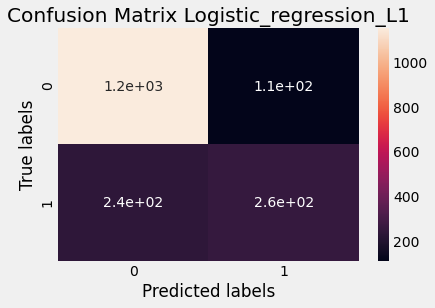

In [157]:
print(confusion(confusion_matrix(y_test,y_pred_lr),'Logistic_regression_L1'))
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_lr, target_names=['Class 0', 'Class 1']))


Classification Report

              precision    recall  f1-score   support

     Class 0       0.80      0.81      0.81      1262
     Class 1       0.51      0.49      0.50       499

    accuracy                           0.72      1761
   macro avg       0.66      0.65      0.65      1761
weighted avg       0.72      0.72      0.72      1761



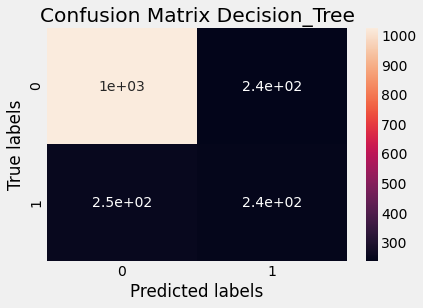

In [158]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_dt, target_names=['Class 0', 'Class 1']))
confusion(confusion_matrix(y_test,y_pred_dt),'Decision_Tree')


Classification Report

              precision    recall  f1-score   support

     Class 0       0.72      1.00      0.83      1262
     Class 1       0.40      0.01      0.02       499

    accuracy                           0.72      1761
   macro avg       0.56      0.50      0.42      1761
weighted avg       0.63      0.72      0.60      1761



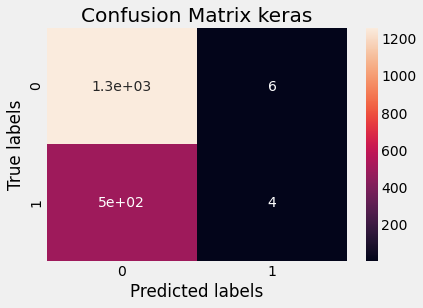

In [159]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test,y_pred_k, target_names=['Class 0', 'Class 1']))
confusion(confusion_matrix(y_test,y_pred_k),'keras')


Classification Report

              precision    recall  f1-score   support

     Class 0       0.87      0.78      0.82      1262
     Class 1       0.56      0.71      0.63       499

    accuracy                           0.76      1761
   macro avg       0.72      0.75      0.73      1761
weighted avg       0.78      0.76      0.77      1761



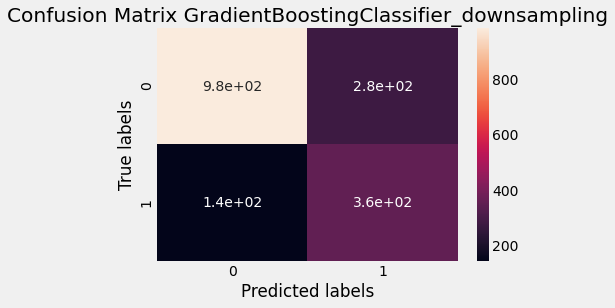

In [206]:
print('\nClassification Report\n')
print(classification_report(y_test,y_pred, target_names=['Class 0', 'Class 1']))
confusion(confusion_matrix(y_test,y_pred),'GradientBoostingClassifier_downsampling')


### Final Conclusions

The neural network model performed worst compared to the other models, maybe some more hyperparameter tuning was required but I concentrated more on balancing the data set. Before balancing the data the models didn't performed well but after upsampling the minority class and with the topping of gridsearch and GradientBoosting Classifier it gave the best perfomance compared to the other models. 